In [1]:
import numpy as np 

from oracle import simulator_moslb
from moslb import moslb

In [2]:
m = 3 # number of objectives
d = 5 # number of context's dimension
K = 5 * d # number of arms at each round

In [3]:
env = simulator_moslb(num_obj=m,num_dim=d,vary_context=0)
env.reset()

In [4]:
alg = moslb(num_dim=d, num_obj=m)
alg.reset()

In [5]:
T = 1000
R = 0 
R_his = [0]

for t in range(T): 
    X = env.observe_context(num_arms=20, verbose=1)
    a_t = alg.take_action(X, alpha=.1)

    r_t = env.get_reward(X[a_t])
    reg_t = env.regret(X[a_t])
    alg.update_params(arm=X[a_t], reward=r_t)

    R += reg_t
    R_his.append(R)
    if (t+1)%100 == 0: print('Round: {:d}, regret: {:.4f}'.format(t, R))

{'#arms': 20,
 '#dimension': 5,
 '#objective': 3,
 '#optimal arms': 13,
 'Regret for each arm': array([[0.        ],
       [0.01435222],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.02030964],
       [0.01308019],
       [0.01800866],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.14722331],
       [0.01923994],
       [0.        ],
       [0.03801384]])}
Round: 99, regret: 1.1500
Round: 199, regret: 1.7789
Round: 299, regret: 2.2595
Round: 399, regret: 2.4640
Round: 499, regret: 2.5531
Round: 599, regret: 2.9712
Round: 699, regret: 2.9712
Round: 799, regret: 3.1020
Round: 899, regret: 3.1805
Round: 999, regret: 3.2459


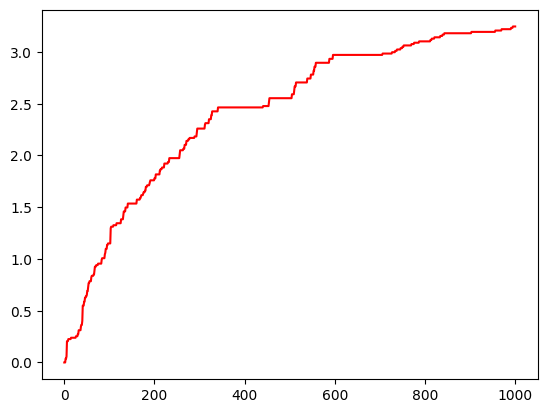

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.figure()
plt.plot(range(T+1), R_his, color='r', linestyle='-', label="P-UCB")

## Example for MOSLB-PL
Running with five objectives under MPL-PL order $\{\{0,1,2\},\{3,4\}\}$.

In [7]:
from oracle import simulator_moslb_pl
from moslb import moslb_pl

In [8]:
pl = [[0,1,2],[3,4]]

In [9]:
env = simulator_moslb_pl(num_dim=d,priority_level=pl,vary_context=1)

In [10]:
alg = moslb_pl(num_dim=d, priority_level=pl)

In [11]:
T = 3000
R = np.zeros((len(pl),))
epsilon = 5 * d**(2/3) * (T)**(-1/3)

env.reset()
alg.reset()

for t in range(T): 
    X = env.observe_context(num_arms=K, verbose=0)
    a_t = alg.take_action(X, epsilon=epsilon, alpha=.1)

    r_t = env.get_reward(X[a_t])
    reg_t = env.regret(X[a_t])
    alg.update_params(arm=X[a_t], reward=r_t)

    R += reg_t
    if (t+1)%100 == 0: print('Round: {:d}, regret: {}'.format(t, R))

Round: 99, regret: [20.09967265 12.01259094]
Round: 199, regret: [37.66828713 24.64099823]
Round: 299, regret: [58.93354557 36.10768786]
Round: 399, regret: [77.45017568 46.88279199]
Round: 499, regret: [81.70838523 48.89332978]
Round: 599, regret: [82.43669935 50.10235767]
Round: 699, regret: [83.03350416 50.67347368]
Round: 799, regret: [83.87330566 50.83829545]
Round: 899, regret: [85.14033042 51.62205768]
Round: 999, regret: [86.24342289 52.5064025 ]
Round: 1099, regret: [86.75498069 53.3425346 ]
Round: 1199, regret: [87.7558869  54.10167174]
Round: 1299, regret: [89.05051301 54.54522292]
Round: 1399, regret: [89.75199055 54.6794182 ]
Round: 1499, regret: [90.84463324 54.84566109]
Round: 1599, regret: [91.88811385 55.50294233]
Round: 1699, regret: [92.57110557 56.2049824 ]
Round: 1799, regret: [93.1085371  56.72721987]
Round: 1899, regret: [93.84047747 57.08038223]
Round: 1999, regret: [94.24874523 57.49138101]
Round: 2099, regret: [94.93170733 57.54172325]
Round: 2199, regret: [95

## Example for MOSLB-PC
Running with five objectives under MPL-PC relation $\{\{0,1\},\{2,3,4\}\}$.

In [12]:
from oracle import simulator_moslb_pc
from moslb import moslb_pc

In [13]:
pc = [[0,1],[2,3,4]]

In [14]:
env = simulator_moslb_pc(num_dim=d,priority_chain=pc,vary_context=True)
env.reset()

In [15]:
alg = moslb_pc(num_dim=d, priority_chain=pc)

In [16]:
T = 3000
R = np.zeros((env.c_max,))
epsilon = 5 * d**(2/3) * (T)**(-1/3)

env.reset()
alg.reset()

for t in range(T): 
    X = env.observe_context(num_arms=K, verbose=0)
    a_t = alg.take_action(X, epsilon=epsilon, alpha=.1)

    r_t = env.get_reward(X[a_t])
    reg_t = env.regret(X[a_t])
    alg.update_params(arm=X[a_t], reward=r_t)

    R += reg_t
    if (t+1)%100 == 0: print('Round: {:d}, regret: {}'.format(t, R))

Round: 99, regret: [17.55 22.75  8.65]
Round: 199, regret: [36.21 53.8  20.38]
Round: 299, regret: [54.58 85.5  31.99]
Round: 399, regret: [ 76.32 112.8   48.12]
Round: 499, regret: [ 81.22 119.06  50.62]
Round: 599, regret: [ 83.42 124.48  53.08]
Round: 699, regret: [ 85.04 125.7   54.64]
Round: 799, regret: [ 86.13 127.79  57.59]
Round: 899, regret: [ 87.6  129.02  58.6 ]
Round: 999, regret: [ 88.6  130.47  59.89]
Round: 1099, regret: [ 90.05 131.59  60.51]
Round: 1199, regret: [ 92.03 134.46  62.45]
Round: 1299, regret: [ 93.67 135.22  63.44]
Round: 1399, regret: [ 95.6  138.48  65.  ]
Round: 1499, regret: [ 96.82 139.94  66.74]
Round: 1599, regret: [ 97.92 140.22  67.31]
Round: 1699, regret: [ 99.21 142.12  68.62]
Round: 1799, regret: [100.61 143.97  70.81]
Round: 1899, regret: [101.69 144.72  71.49]
Round: 1999, regret: [102.34 145.04  72.75]
Round: 2099, regret: [103.25 145.63  74.18]
Round: 2199, regret: [103.96 145.94  76.61]
Round: 2299, regret: [104.88 146.31  78.86]
Round: 2